In [2]:
# Install TensorFlow if not already installed
# !pip install tensorflow

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
import os


In [6]:
# Update this to your dataset path (where 80 plant folders are)
dataset_path = "C:/Users/admin/MYPROJECTS/MedicinalPlants/images"

# Parameters
img_size = (224, 224)
batch_size = 32
seed = 123

# Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'  # integer labels for sparse_categorical_crossentropy
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

class_names = train_ds.class_names
num_classes = len(class_names)


Found 7963 files belonging to 80 classes.
Using 6371 files for training.
Found 7963 files belonging to 80 classes.
Using 1592 files for validation.


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [10]:
# Load pretrained MobileNetV2 base
base_model = MobileNetV2(input_shape=img_size + (3,),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False  # Freeze for transfer learning

# Build full model
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.1212 - loss: 4.2252 - val_accuracy: 0.4962 - val_loss: 2.0953
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.4214 - loss: 2.2396 - val_accuracy: 0.6043 - val_loss: 1.6252
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.5567 - loss: 1.7085 - val_accuracy: 0.6577 - val_loss: 1.4164
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.6213 - loss: 1.4529 - val_accuracy: 0.6910 - val_loss: 1.2659
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.6469 - loss: 1.3026 - val_accuracy: 0.6947 - val_loss: 1.2035
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.6866 - loss: 1.1544 - val_accuracy: 0.7010 - val_loss: 1.1399
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.7067 - loss: 1.0694 - val_accuracy: 0.7142 - val_loss: 1.0967
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.7183 - loss: 1.0288 - val_accu

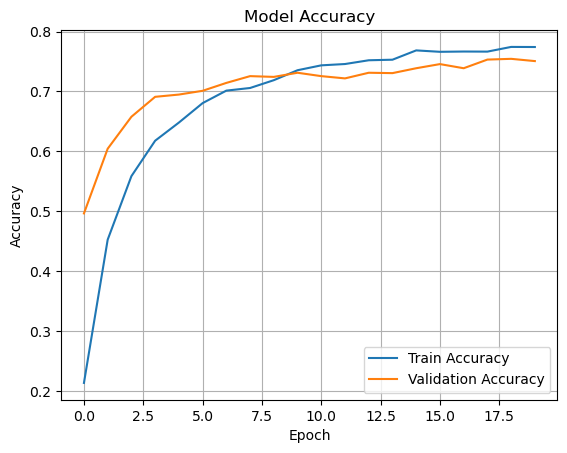

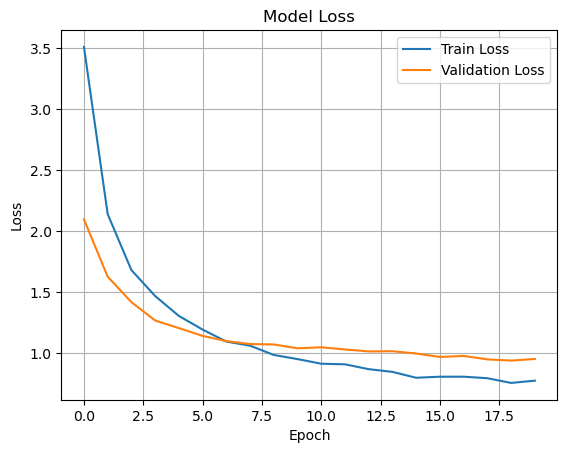

In [18]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
# Save model in HDF5 format
model.save("MobileNetModel.h5")
print("model saved")

model saved


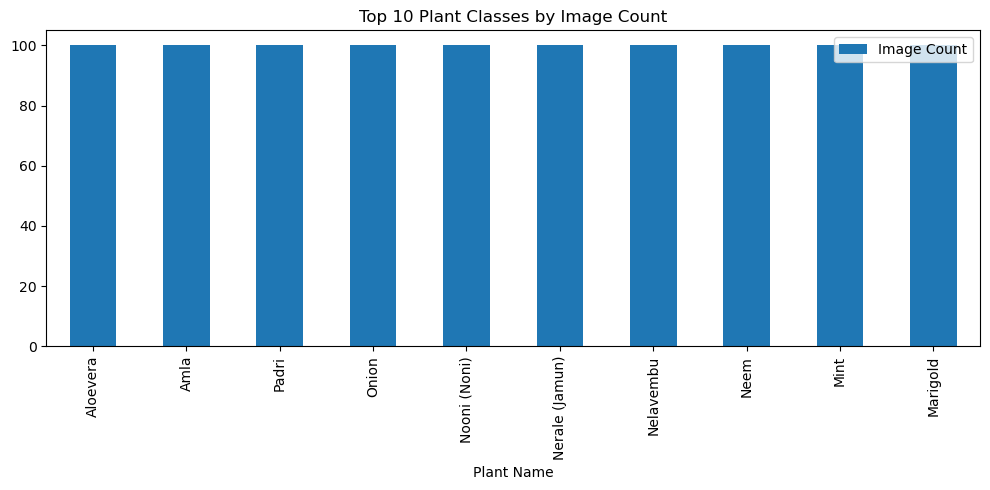

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Count number of images per class
data_dir = "C:/Users/admin/MYPROJECTS/MedicinalPlants/images"  # set this to your dataset root
class_names = os.listdir(data_dir)
image_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in class_names}

# Convert to DataFrame for easy handling
df = pd.DataFrame(list(image_counts.items()), columns=['Plant Name', 'Image Count'])

# Top 10 most represented classes
df.sort_values('Image Count', ascending=False).head(10).plot(
    x='Plant Name', y='Image Count', kind='bar', title='Top 10 Plant Classes by Image Count', figsize=(10,5)
)
plt.tight_layout()
plt.show()


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [42]:
temp_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/admin/MYPROJECTS/MedicinalPlants/images",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)
class_names = temp_ds.class_names
print(class_names)


Found 7963 files belonging to 80 classes.
Using 1592 files for validation.
['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Ashoka', 'Asthma Weed', 'Badipala', 'Balloon Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Camphor', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron Lime', 'Coffee', 'Common Rue (Naagdalli)', 'Coriander', 'Curry', 'Doddpathre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase (Poppy)', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin Plant', 'Jackfruit', 'Jasmine', 'Kamakasturi', 'Kambajala', 'Kasambruga', 'Kepala', 'Kohlrabi', 'Lantana', 'Lemon', 'Lemongrass', 'Malabar Nut', 'Malabar Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale (Jamun)', 'Nooni (Noni)', 'Onion', 'Padri', 'Palak (Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomegranate', 'Pumpkin', 'Radish', 'Rose', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach', 'Tamarind', 'Taro', 'Tecoma', 'T

In [44]:
y_true = np.concatenate([y for x, y in val_ds], axis=0)

# Get predicted labels
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 820ms/step


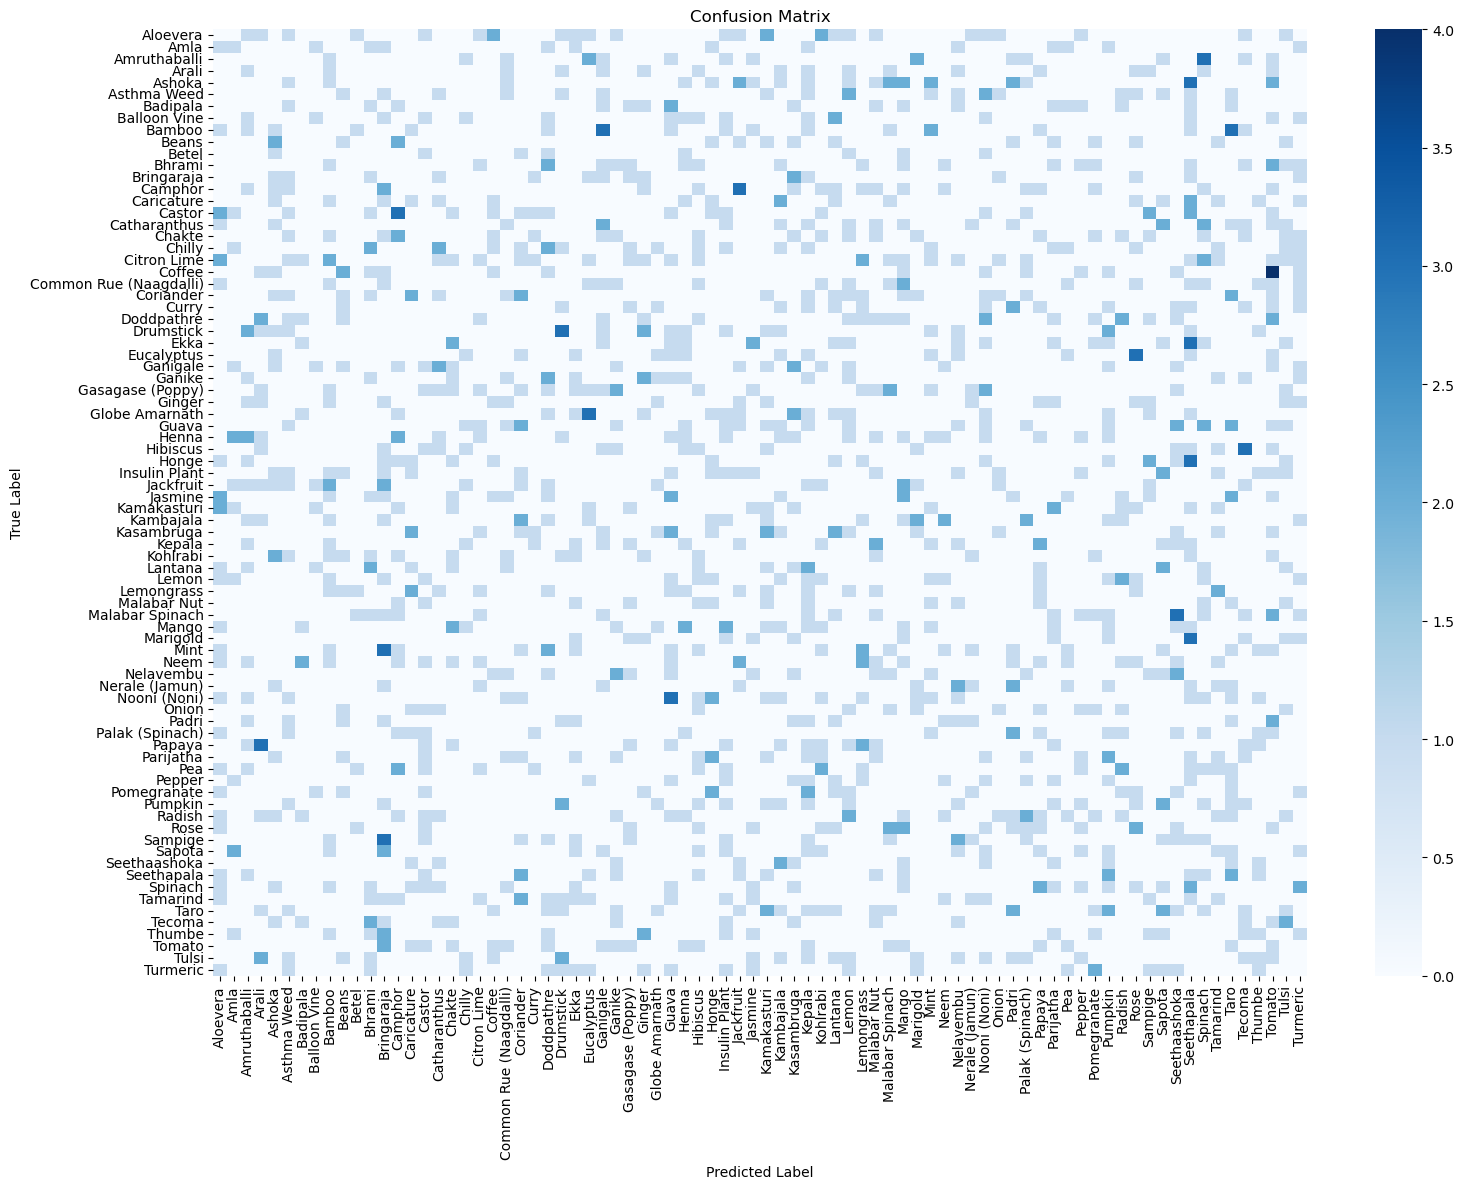

In [48]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=False, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


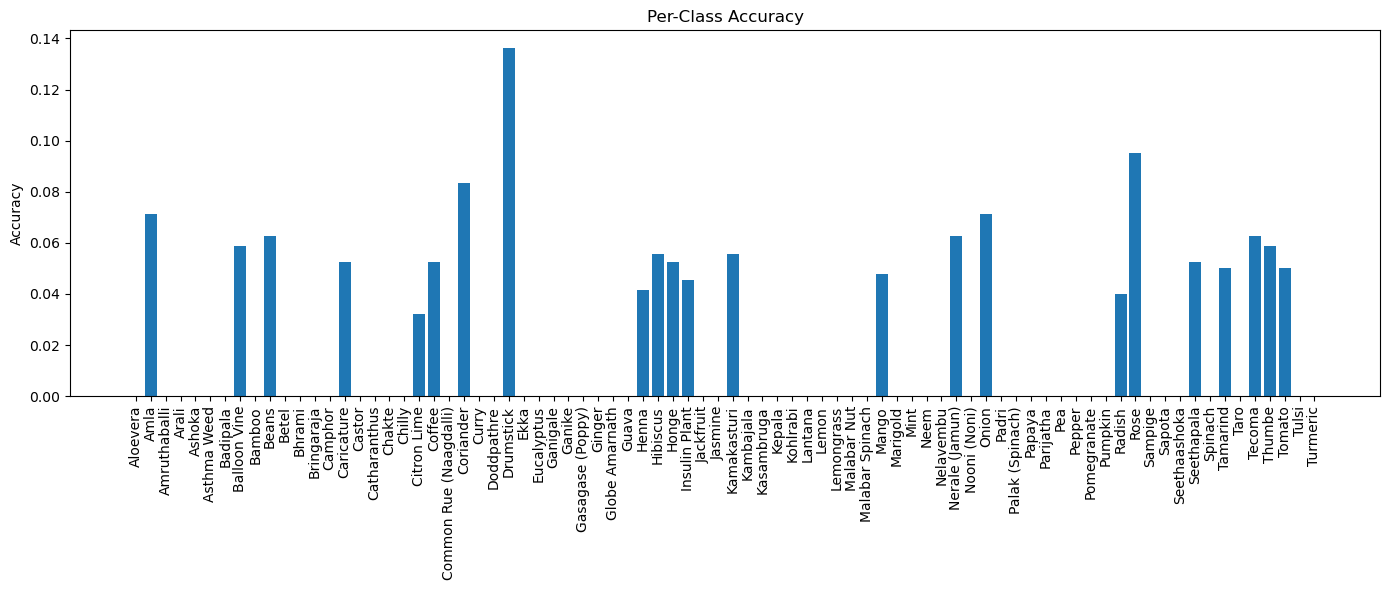

In [50]:
from sklearn.metrics import accuracy_score

per_class_acc = []
for i, class_name in enumerate(class_names):
    idxs = np.where(y_true == i)
    acc = accuracy_score(y_true[idxs], y_pred[idxs])
    per_class_acc.append(acc)

plt.figure(figsize=(14, 6))
plt.bar(class_names, per_class_acc)
plt.xticks(rotation=90)
plt.title('Per-Class Accuracy')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


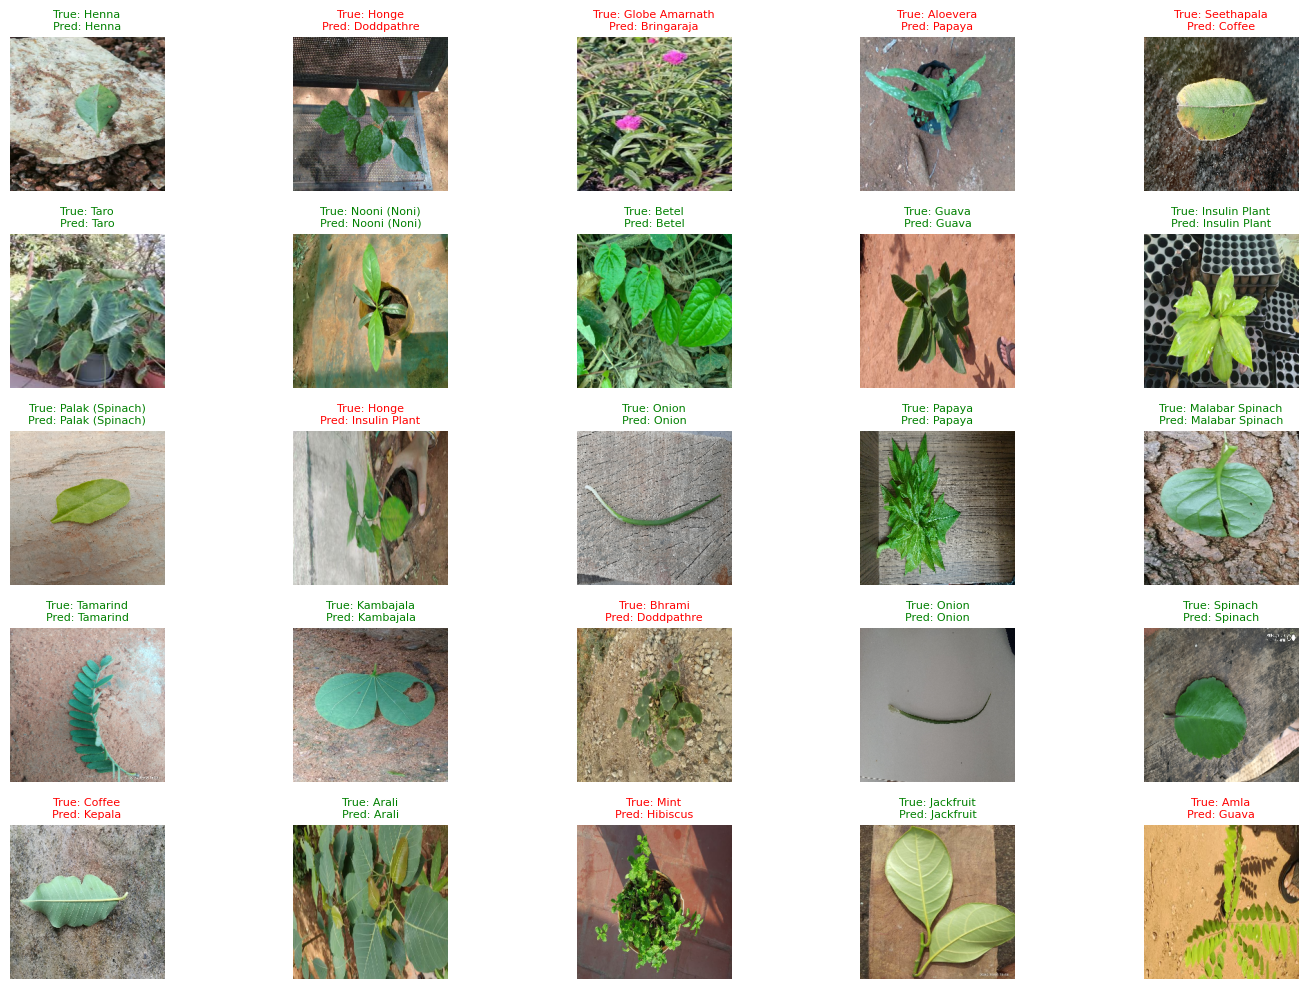

In [52]:
import matplotlib.pyplot as plt

# Unbatch the dataset
val_images, val_labels = next(iter(val_ds.unbatch().batch(25)))

pred_probs = model.predict(val_images)
pred_labels = np.argmax(pred_probs, axis=1)

plt.figure(figsize=(15, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(val_images[i].numpy().astype("uint8"))
    true = class_names[val_labels[i]]
    pred = class_names[pred_labels[i]]
    color = 'green' if true == pred else 'red'
    plt.title(f'True: {true}\nPred: {pred}', color=color, fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()


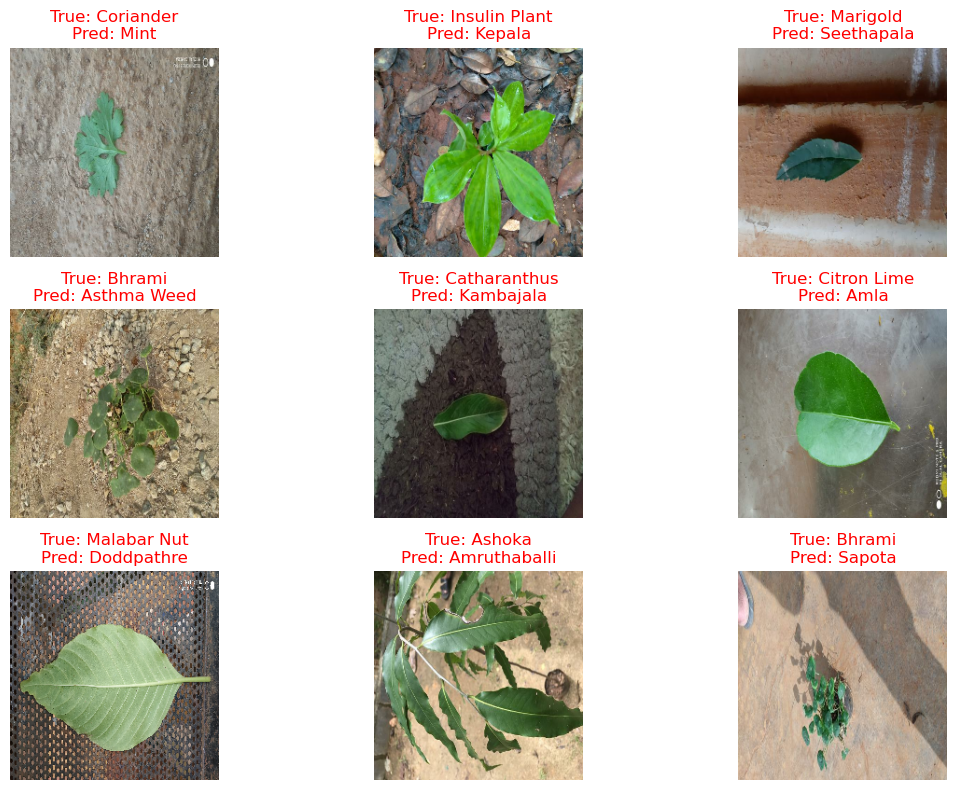

In [54]:
misclassified_idxs = np.where(y_true != y_pred)[0]
plt.figure(figsize=(12, 8))
for i in range(9):
    idx = misclassified_idxs[i]
    image, true_label = list(val_ds.unbatch().as_numpy_iterator())[idx]
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.astype("uint8"))
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[y_pred[idx]]}", color='red')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [108]:
from tensorflow.keras.models import load_model

loaded_model = tf.keras.models.load_model('C:/Users/admin/MYPROJECTS/MedicinalPlants/MobileNetModel.h5')

In [110]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, img_size=(224, 224)):
    # Load the image and resize it
    img = image.load_img(img_path, target_size=img_size)
    
    # Convert image to array
    img_array = image.img_to_array(img)
    
    # Expand dimensions to fit model input (add batch dimension)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Rescale the image (same as during training)
    img_array = img_array / 255.0
    
    return img_array


In [112]:
def predict_plant(img_path):
    # Preprocess the image
    img_array = preprocess_image(img_path)
    
    # Make the prediction
    predictions = loaded_model.predict(img_array)
    
    # Get the predicted class (index of the highest probability)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    
    # Get the class name using the class index
    predicted_class_name = class_names[predicted_class_index]
    
    return predicted_class_name


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


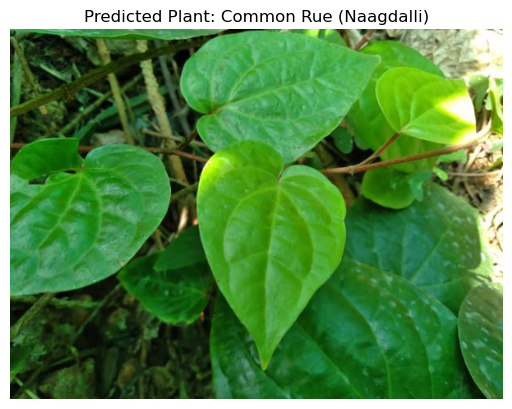

In [122]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_image_with_prediction(img_path):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    
    predicted_plant_name = predict_plant(img_path)
    plt.title(f"Predicted Plant: {predicted_plant_name}")
    plt.show()

# Display the image and prediction
display_image_with_prediction(image_path)


In [128]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Get true labels from validation or test dataset
y_true = np.concatenate([y for x, y in val_ds], axis=0)  # True labels (validation set)

# Get predictions from the model
y_pred_prob = model.predict(val_ds)  # Model predictions (probabilities)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_prob, axis=1)  # Predicted class labels (indices)


50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 896ms/step


In [132]:
# Get predictions
y_pred_prob = model.predict(val_ds)  # Predicting probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class indices


50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 900ms/step


In [134]:
y_true = np.concatenate([y for x, y in val_ds], axis=0)


In [136]:
print("True labels shape:", y_true.shape)
print("Predicted labels shape:", y_pred.shape)


True labels shape: (1592,)
Predicted labels shape: (1592,)


In [146]:
import numpy as np

# Get true labels and predictions
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Check how many unique classes were predicted
print("Predicted classes:", np.unique(y_pred, return_counts=True))
print("Actual classes:", np.unique(y_true, return_counts=True))


50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 840ms/step
Predicted classes: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], dtype=int64), array([28, 13, 22, 18, 22, 22,  9,  7, 26, 16,  6, 21, 36, 24, 16, 21, 18,
       18, 10, 14, 14, 17, 23,  8, 27, 18, 18, 16, 24, 19, 15, 17, 10, 31,
       19, 25, 18, 26, 20, 16, 24, 23, 20, 35, 20, 20, 27, 19, 22, 18, 29,
       14, 19, 12, 22, 11, 25, 10, 19, 18, 22, 19, 12, 15, 14, 28, 17, 20,
       15, 21, 24, 43, 25, 18, 27, 21, 13, 38, 21, 24], dtype=int64))
Actual classes: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Get true labels and images from the validation dataset
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Convert to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print metrics
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='macro'))
print("Recall:", recall_score(y_true, y_pred, average='macro'))
print("F1 Score:", f1_score(y_true, y_pred, average='macro'))

# Optional: classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [150]:
import collections

print("Predicted label counts:")
print(collections.Counter(y_pred))


Predicted label counts:
Counter({71: 43, 77: 38, 12: 36, 43: 35, 33: 31, 50: 29, 0: 28, 65: 28, 74: 27, 24: 27, 46: 27, 8: 26, 37: 26, 72: 25, 56: 25, 35: 25, 28: 24, 40: 24, 70: 24, 13: 24, 79: 24, 41: 23, 22: 23, 60: 22, 2: 22, 5: 22, 48: 22, 54: 22, 4: 22, 11: 21, 75: 21, 15: 21, 78: 21, 69: 21, 67: 20, 38: 20, 42: 20, 45: 20, 44: 20, 58: 19, 34: 19, 29: 19, 61: 19, 47: 19, 52: 19, 49: 18, 36: 18, 73: 18, 17: 18, 16: 18, 26: 18, 59: 18, 25: 18, 3: 18, 21: 17, 66: 17, 31: 17, 14: 16, 27: 16, 39: 16, 9: 16, 30: 15, 68: 15, 63: 15, 20: 14, 19: 14, 51: 14, 64: 14, 76: 13, 1: 13, 53: 12, 62: 12, 55: 11, 18: 10, 57: 10, 32: 10, 6: 9, 23: 8, 7: 7, 10: 6})


In [182]:
import os
from collections import Counter

dataset_path = "C:/Users/admin/MYPROJECTS/MedicinalPlants/images"
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in os.listdir(dataset_path)}
print(class_counts)


{'Aloevera': 100, 'Amla': 100, 'Amruthaballi': 100, 'Arali': 100, 'Ashoka': 100, 'Asthma Weed': 100, 'Badipala': 100, 'Balloon Vine': 100, 'Bamboo': 100, 'Beans': 100, 'Betel': 100, 'Bhrami': 100, 'Bringaraja': 100, 'Camphor': 99, 'Caricature': 100, 'Castor': 100, 'Catharanthus': 100, 'Chakte': 100, 'Chilly': 100, 'Citron Lime': 100, 'Coffee': 100, 'Common Rue (Naagdalli)': 100, 'Coriander': 100, 'Curry': 100, 'Doddpathre': 100, 'Drumstick': 100, 'Ekka': 100, 'Eucalyptus': 100, 'Ganigale': 100, 'Ganike': 100, 'Gasagase (Poppy)': 100, 'Ginger': 100, 'Globe Amarnath': 100, 'Guava': 100, 'Henna': 100, 'Hibiscus': 100, 'Honge': 100, 'Insulin Plant': 100, 'Jackfruit': 100, 'Jasmine': 100, 'Kamakasturi': 67, 'Kambajala': 100, 'Kasambruga': 100, 'Kepala': 100, 'Kohlrabi': 100, 'Lantana': 100, 'Lemon': 100, 'Lemongrass': 100, 'Malabar Nut': 100, 'Malabar Spinach': 100, 'Mango': 100, 'Marigold': 100, 'Mint': 100, 'Neem': 100, 'Nelavembu': 100, 'Nerale (Jamun)': 100, 'Nooni (Noni)': 100, 'Onion'